In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit import ParameterVector
from qiskit_aer import AerSimulator

simulator = AerSimulator()

In [5]:
π = np.pi
scrn_range = 6*π
scrn_qbs = 8
φ_arr = ParameterVector('φ',scrn_qbs)

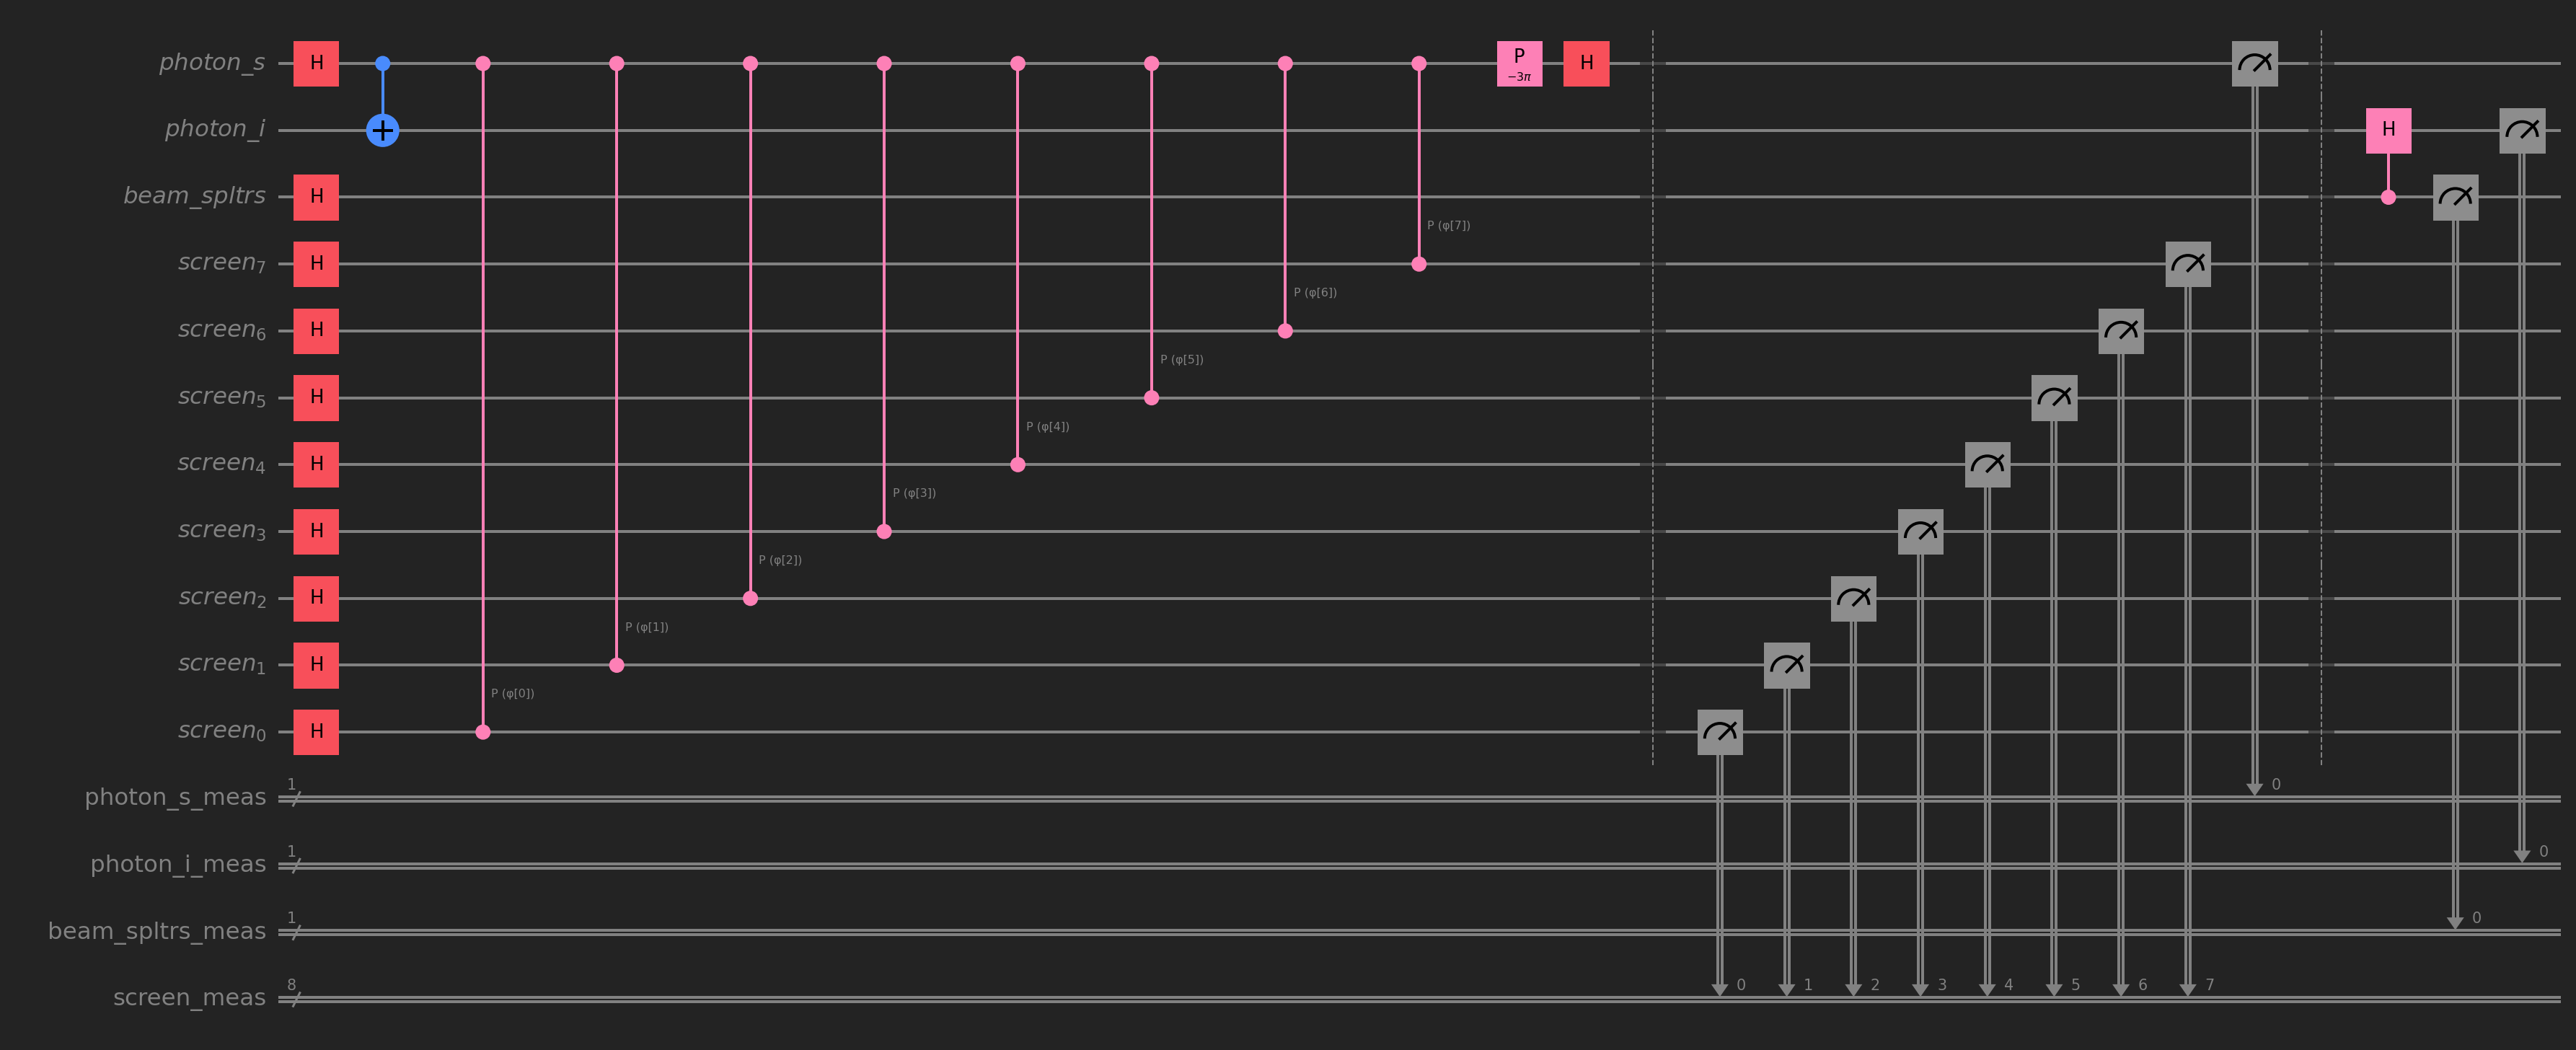

In [15]:
qr_sp = QuantumRegister(1, name='photon_s')
qr_ip = QuantumRegister(1, name='photon_i')
qr_bs = QuantumRegister(1, name='beam_spltrs')
qr_scrn = QuantumRegister(scrn_qbs, name='screen')
cr_sp = ClassicalRegister(1,'photon_s_meas')
cr_ip = ClassicalRegister(1,'photon_i_meas')
cr_bs = ClassicalRegister(1,'beam_spltrs_meas')
cr_scrn = ClassicalRegister(scrn_qbs,'screen_meas')

qc = QuantumCircuit(qr_scrn,qr_bs,qr_ip,qr_sp,cr_scrn,cr_bs,cr_ip,cr_sp)
qc.h(qr_sp)
qc.cx(qr_sp,qr_ip)

qc.h(qr_scrn)
qc.h(qr_bs)

for qb, φ in enumerate(φ_arr):
    qc.cp(φ,qr_scrn[qb],qr_sp)
    
qc.p(-scrn_range/2,qr_sp)
qc.h(qr_sp)
qc.barrier()

qc.measure(qr_scrn,cr_scrn)
qc.measure(qr_sp,cr_sp)
qc.barrier()

qc.ch(qr_bs,qr_ip)
qc.measure(qr_bs,cr_bs)
qc.measure(qr_ip,cr_ip)
qc.draw(fold=-1)

In [16]:
qc_trans = transpile(qc, backend=simulator)

In [22]:
φ_step = scrn_range/(2**scrn_qbs)
φ_vals = [(2**(qb))*φ_step for qb in range(scrn_qbs)]

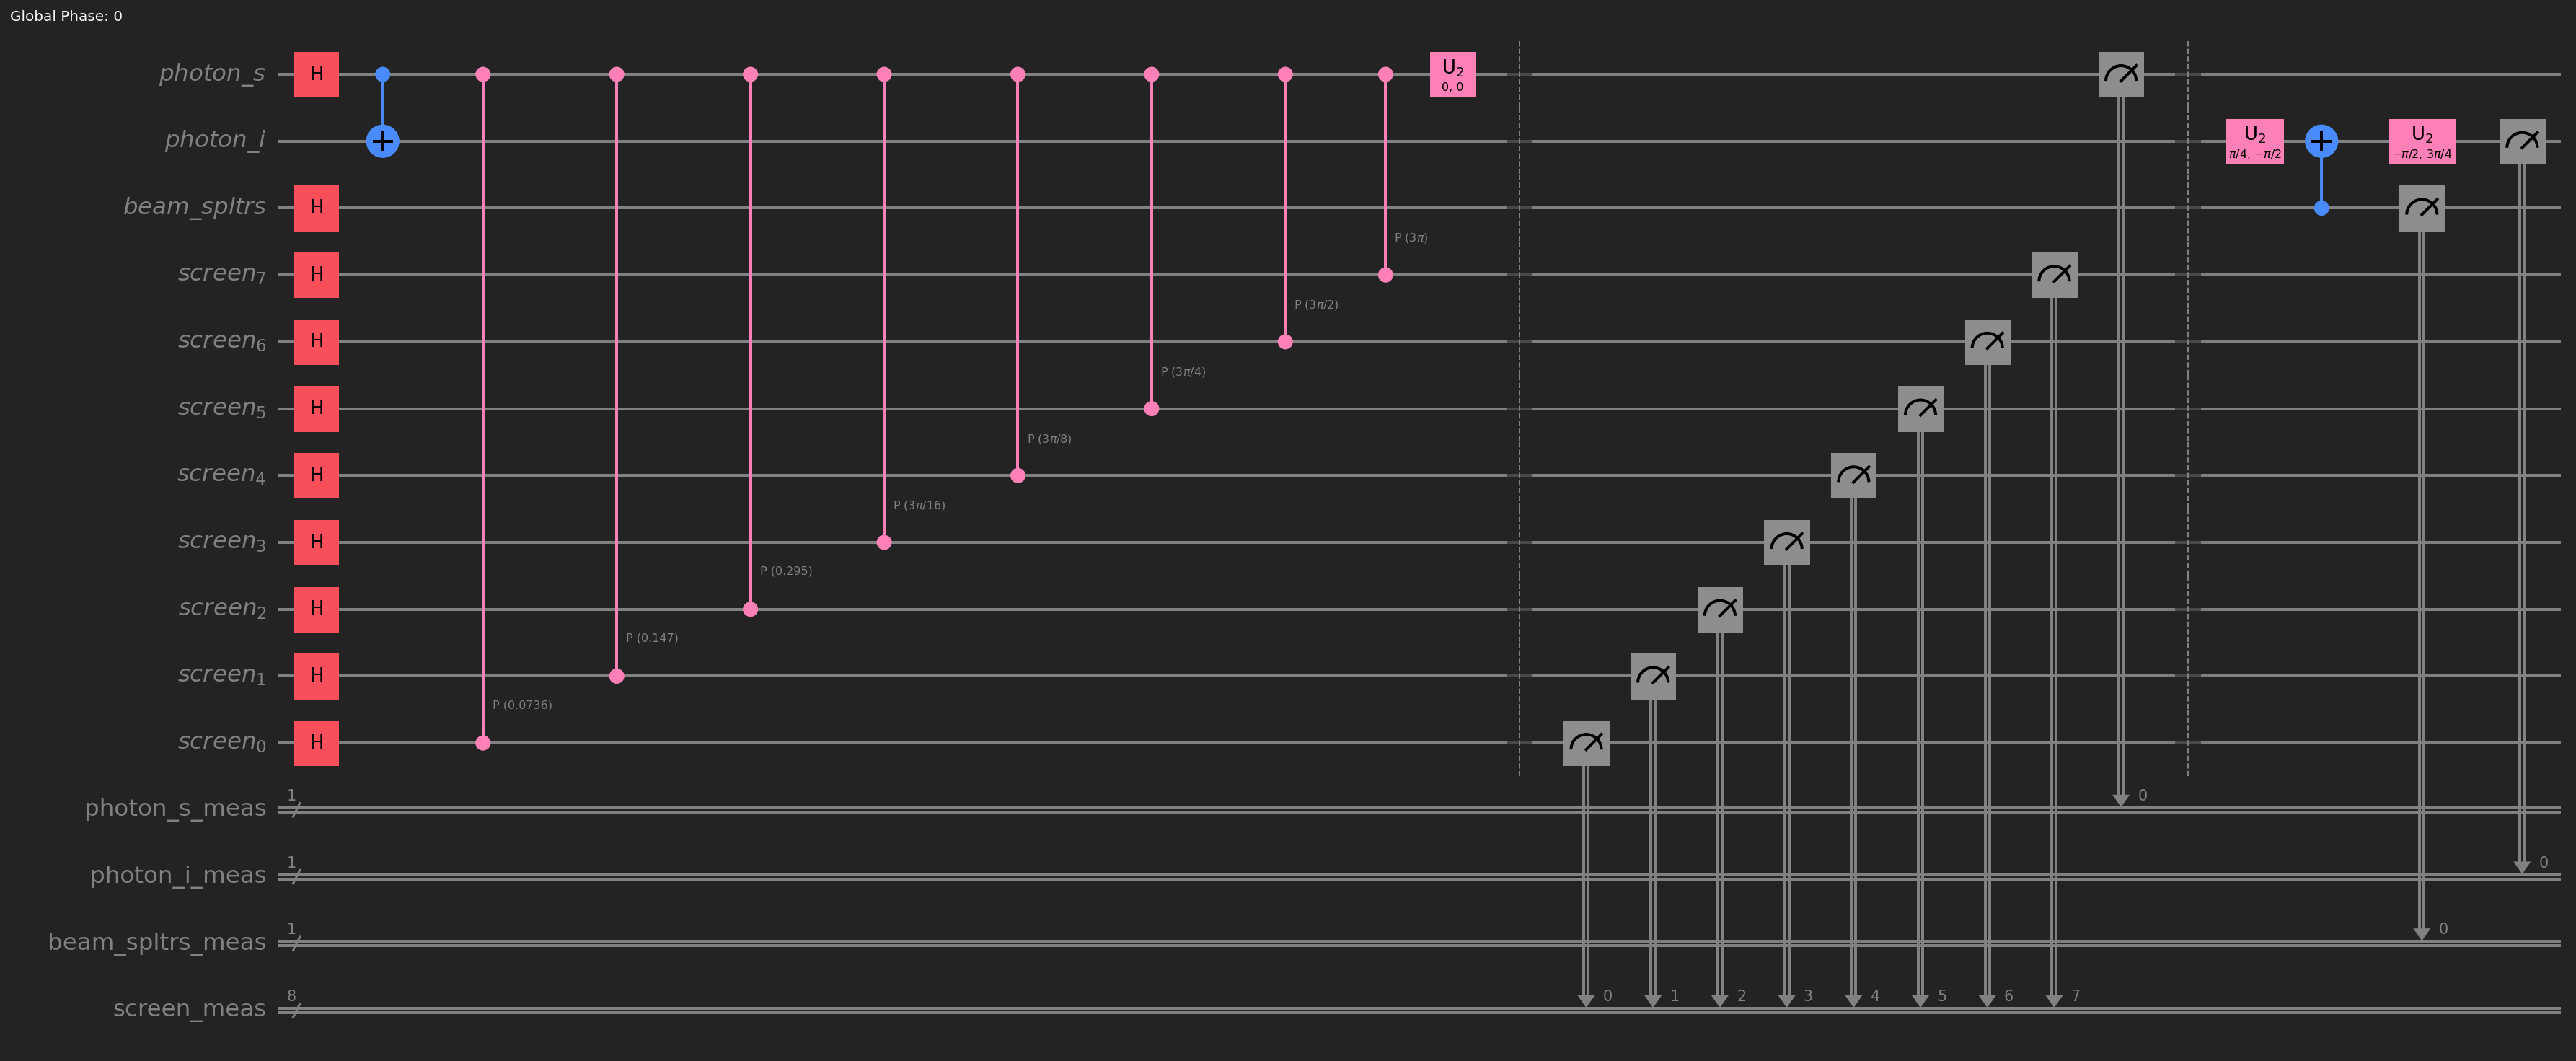

In [23]:
qc_sim = qc_trans.assign_parameters({φ_arr:φ_vals})
qc_sim.draw(fold=-1)

In [24]:
shots = 2**14
job = simulator.run(qc_sim, shots=shots)
sim_results = job.result()
sim_counts = sim_results.get_counts()

In [42]:
φ_hit_d1 = []
φ_hit_d2 = []
φ_hit_d3 = []
φ_hit_d4 = []

for res_str, res_counts in sim_counts.items():
    if res_str[0] == '0':
        φ_val = 0
        for i, bit in enumerate(reversed(res_str[6:])):
            φ_val += int(bit)*φ_vals[i]
        
        φ_val -= scrn_range/2
        
        if res_str[2:5] == '0 0': 
            φ_hit_d3 += res_counts*[φ_val]
        elif res_str[2:5] == '1 0':
            φ_hit_d4 += res_counts*[φ_val]
        elif res_str[2:5] == '0 1':
            φ_hit_d1 += res_counts*[φ_val]
        elif res_str[2:5] == '1 1':
            φ_hit_d2 += res_counts*[φ_val]

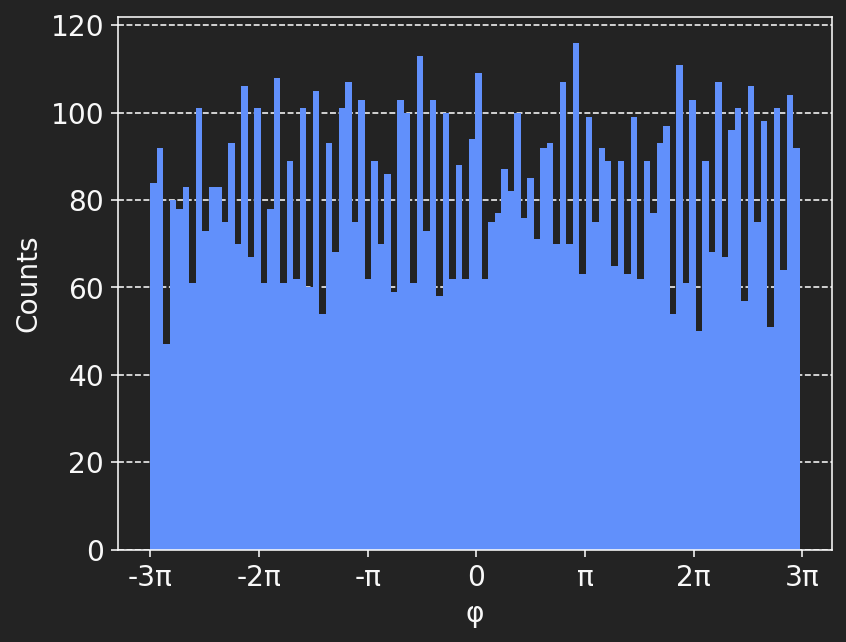

In [59]:
ax = plt.subplot()
plt.hist(φ_hit_d1+φ_hit_d2+φ_hit_d3+φ_hit_d4, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

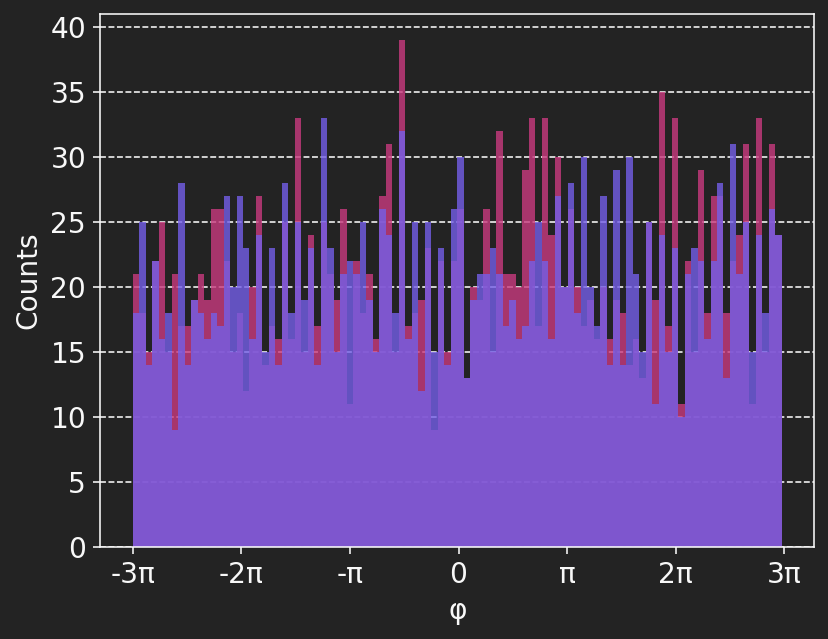

In [57]:
ax = plt.subplot()
plt.hist(φ_hit_d4, bins=100, color='#c93a7f',alpha=0.8)
plt.hist(φ_hit_d3, bins=100, color='#745fe8',alpha=0.8)

plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
ax.set_axisbelow(True)
plt.grid(axis='y',linestyle='dashed')
plt.show()

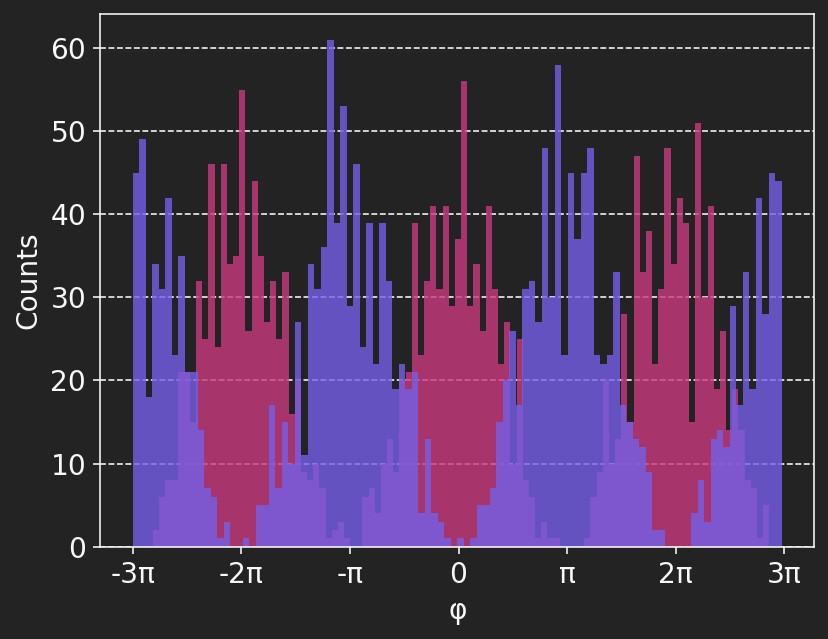

In [58]:
ax = plt.subplot()
plt.hist(φ_hit_d1, bins=100, color='#c93a7f',alpha=0.8)
plt.hist(φ_hit_d2, bins=100, color='#745fe8',alpha=0.8)

plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
ax.set_axisbelow(True)
plt.grid(axis='y',linestyle='dashed')
plt.show()